# Presenting PISA results
## 0. Warming up 
### a) Reading the data 
- From Excel file riket2023_åk9_np.xlsx"
- for different sheets representing the sujects

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
def read_data(mysheetname):
    df_tmp=pd.read_excel("./Data/riket2023_åk9_np.xlsx", sheet_name=mysheetname, skiprows=8)
    df_tmp.columns=['Plats', 'Huvudman','Totalt (A-F)','Flickor (A-F)','Pojkar (A-F)','Totalt (A-E)','Flickor (A-E)','Pojkar (A-E)','Totalt (poäng)','Flickor (poäng)','Pojkar (poäng)']
    
    # list the numeric columns to be cleaned
    numeric_columns = ['Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (poäng)', 'Flickor (poäng)', 'Pojkar (poäng)']
    # Cleaning the data, i.e. removing (replacing) the '~' with ''ArithmeticError 
    df_tmp[numeric_columns] = df_tmp[numeric_columns].replace('[^0-9.]', '', regex=True)
    #df_tmp[numeric_columns] = df_tmp[numeric_columns].astype(float)
   
    return df_tmp


df_engelska=read_data("Engelska")
df_matematik=read_data("Matematik")
df_svenska=read_data("Svenska")
df_sv_andra_sp=read_data("Svenska som andraspråk")
# removing the empty row from svenska som andra språk
#i = df_sv_andra_sp[df_sv_andra_sp.Huvudman=='Skolverket'].index()
df_sv_andra_sp=df_sv_andra_sp.drop(3)


# for som reason type casting could not be done in the function read_data, it gives a value error str to float
numeric_columns = ['Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (poäng)', 'Flickor (poäng)', 'Pojkar (poäng)']
df_engelska[numeric_columns] = df_engelska[numeric_columns].astype(float)
df_matematik[numeric_columns] = df_matematik[numeric_columns].astype(float)
df_svenska[numeric_columns] = df_svenska[numeric_columns].astype(float)
df_sv_andra_sp[numeric_columns] = df_sv_andra_sp[numeric_columns].astype(float)

# Defining colors for charts/plots
GRAY1 = "#6b7280"


### b) How man has failed mathematics: total, girls and boys 

In [3]:
# functions for calculating the number of failed students: total, girls and boys for the 
# different classes (in "Huvudman") 
def func_failed_tot(row):
    z = row['Totalt (A-F)']*(1-row['Totalt (A-E)']/100)
    return z

def func_failed_girls(row):
    z = row['Flickor (A-F)']*(1-row['Flickor (A-E)']/100)
    return z

def func_failed_boys(row):
    z = row['Pojkar (A-F)']*(1-row['Pojkar (A-E)']/100)
    return z

df_failed=pd.DataFrame()

df_failed['Total']=df_matematik.apply(func_failed_tot, axis=1).astype(int)

df_failed['Girls']=df_matematik.apply(func_failed_girls, axis=1).astype(int)

df_failed['Pojkar']=df_matematik.apply(func_failed_boys, axis=1).astype(int)

df_failed[['Huvudman']] =df_matematik[['Huvudman']]
df_failed

# content of df_failed contains the number of failed students in mathematics for 
# the different classes of"Huvudman"


,Total,Girls,Pojkar,Huvudman
0,11637,5824,5797,Samtliga
1,10015,4967,5034,Kommunal
2,1601,868,742,Enskild
3,0,0,0,Skolverket


### c) Bar chart for the total score in the different subjects
- initially we add these to a joint dataframe that is used for creating the barchart


In [4]:

def get_scores(df_subject, subject):
    df_tmp=pd.DataFrame()
    df_tmp[['Score','Huvudman']]=df_subject[['Totalt (poäng)','Huvudman']]
    df_tmp.insert(1,'Subject', subject)
    return df_tmp
df_eng=get_scores(df_engelska,'English')
df_math=get_scores(df_matematik,'Math')
df_swed=get_scores(df_svenska,'Swedish')
df_sv2sp=get_scores(df_sv_andra_sp,"Swedish 2nd lang")

df_all_scores= pd.concat([df_eng, df_math, df_swed, df_sv2sp])


Fixing a grouped barchart

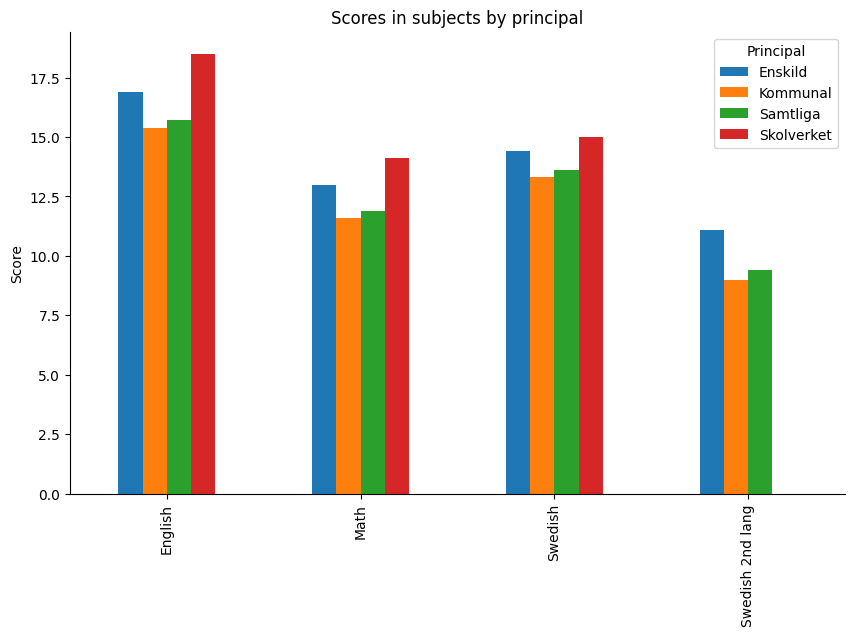

In [5]:

df_pivot = df_all_scores.pivot(index='Subject', columns='Huvudman', values='Score')
ax = df_pivot.plot(kind='bar', stacked=False, figsize=(10, 6))

# Adding labels and title
plt.xlabel('')
plt.ylabel('Score')
plt.title('Scores in subjects by principal')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(title='Principal')
plt.show()

### d/e) Barcharts in subplot for the different subjects

In [6]:
df_eng[['Huvudman','Score']]

,Huvudman,Score
0,Samtliga,15.7
1,Kommunal,15.4
2,Enskild,16.9
3,Skolverket,18.5


Text(0.5, 1.0, 'Svenska som 2:a språk')

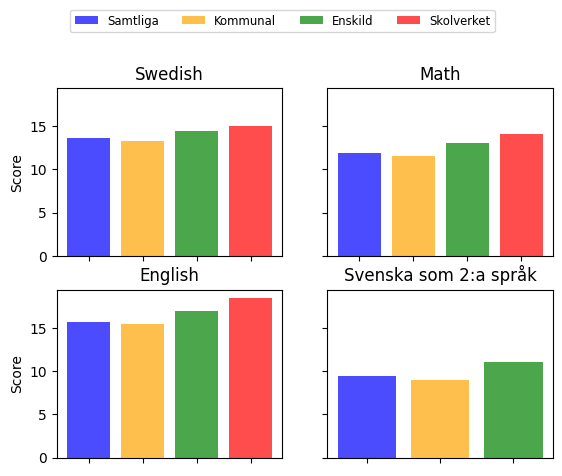

In [7]:
from matplotlib.lines import Line2D

# Creating the plot consisting of 4 subplots (2x2)
fig, axes = plt.subplots(nrows=2, ncols=2, sharey='all', squeeze=True)

# First subplot. In this we state colors to be used for each category and express the legend,
# using defined elements for each category
axes[0,0].bar(df_swed['Huvudman'], df_swed['Score'], color=['blue', 'orange', 'green', 'red'], alpha=0.7, label=df_swed['Huvudman'])
legend_elements = [Line2D([0], [0], color='blue', lw=10, label='Samtliga'),
                   Line2D([0], [0], color='orange', lw=10, label='Kommunal'),
                   Line2D([0], [0], color='green', lw=10, label='Enskild'),
                   Line2D([0], [0], color='red', lw=10, label='Skolverket')]

# Add legend with defined elements set title an Y-axis (for subplot [0,0] and [1,0])
axes[0,0].legend(handles=legend_elements)
axes[0,0].set_title('Swedish')

axes[0,0].set_ylabel('Score')
axes[1,0].set_ylabel('Score')

# make the legend horizontal instead of vertical and move the legendbox to upper area, remove x-labels
axes[0,0].legend(loc='upper center', bbox_to_anchor=(1, 1.5), ncol=len(ax.patches)//2, fontsize='small')
axes[0,0].set_xticklabels([])

# repeat for the subplot of math, english and swedish as a 2nd language, i.e. create plot 
# (without legend), remove x-axis labels and set the titles.
axes[0,1].bar(df_math['Huvudman'], df_math['Score'], color=['blue', 'orange', 'green', 'red'], alpha=0.7)
axes[0,1].set_xticklabels([])
axes[0,1].set_title('Math')

axes[1,0].bar(df_eng['Huvudman'], df_eng['Score'], color=['blue', 'orange', 'green', 'red'], alpha=0.7)
axes[1,0].set_xticklabels([])
axes[1,0].set_title('English')


axes[1,1].bar(df_sv2sp['Huvudman'], df_sv2sp['Score'], color=['blue', 'orange', 'green', 'red'], alpha=0.7)
axes[1,1].set_xticklabels([])
axes[1,1].set_title('Svenska som 2:a språk')



## 1. Warming up grades and exams
- Using the file betyg_o_prov_riksnivå.xlsx.
- using Plotly for graphs and panda for other stuff

### reading the datafile

In [8]:
def read_data2(mysheetname,startrow, header):
    df_tmp=pd.read_excel("./Data/betyg_o_prov_riksnivå.xlsx", sheet_name=mysheetname, skiprows=startrow)
    df_tmp.columns=header
    # Cleaning "därav" rows
    df_tmp.drop(df_tmp[df_tmp['Läsår\nHuvudman\nBakgrund']=='därav'].index, inplace=True)
    # Cleaning Nan values rows with empty "Läsår/huvudman/Bakgrund" 
    df_tmp.drop(df_tmp[df_tmp['Läsår\nHuvudman\nBakgrund'].isnull()].index, inplace=True)
    
    return df_tmp
# creating dataframe headers
tabell1Bheader=['Läsår\nHuvudman\nBakgrund', 'Totalt (merit 16 ämnen)','Flickor (merit 16 ämnen)','Pojkar (merit 16 ämnen)','Totalt (merit 17 ämnen)','Flickor (merit 17 ämnen)','Pojkar (merit 17 ämnen)','Totalt (procent ej godkänt)','Flickor (procent ej godkänt)','Pojkar (procent ej godkänt)']
tabell1Aheader=['Läsår\nHuvudman\nBakgrund', 'Totalt (åk9)','Flickor (åk9)','Pojkar (åk9)','Totalt (slutbetyg)','Flickor (slutbetyg)','Pojkar (slutbetyg)','Totalt (godkända)','Flickor (godkända)','Pojkar (godkända)']
df_tabell1A=read_data2('Tabell 1A',6, tabell1Aheader)
# Cleaning the row of NaN not captured in function
df_tabell1A.drop(df_tabell1A[df_tabell1A['Totalt (åk9)'].isnull()].index, inplace=True)



df_tabell1B=read_data2('Tabell 1B',7, tabell1Bheader)
# Cleaning row of NaN not capured in function
df_tabell1B.drop(df_tabell1B[df_tabell1B['Totalt (merit 16 ämnen)'].isnull()].index, inplace=True)




####  a) Create a linechart with proportion of students that failed in more than one subject between 18-23, include total, girls and boys

Alternative I: Based on the fraction (from Table 1A) 
$$(1 - \frac{N_{\text{students with pass in one or more subjects}}}{N_{\text{number of students}}})$$

In [9]:
# Plotly lib
import plotly_express as px 

def func_failed_fracT(row):
    z = (1.0-(row['Totalt (godkända)']/row['Totalt (åk9)']))*100
    return z

def func_failed_fracG(row):
    z = (1.0-(row['Flickor (godkända)']/row['Flickor (åk9)']))*100
    return z

def func_failed_fracB(row):
    z = (1.0-(row['Pojkar (godkända)']/row['Pojkar (åk9)']))*100
    return z


# Create a new dataframe and use a mask to obtain the years
df_data=pd.DataFrame()
df_data = df_tabell1A[df_tabell1A['Läsår\nHuvudman\nBakgrund'].isin(['2018/19', '2019/20', '2020/21', '2021/22', '2022/23'])].copy()

# Rename column such that it looks more fancy in figure, add columns with percentages of failed 
# for the different categories
df_data.rename(columns={'Läsår\nHuvudman\nBakgrund':'Årtal'}, inplace = True)
df_data.insert(10,"Totalt (underkända)", df_data.apply(func_failed_fracT, axis=1), True)
df_data.insert(11,'Flickor (underkända)', df_data.apply(func_failed_fracG, axis=1), True)
df_data.insert(12,'Pojkar (underkända)', df_data.apply(func_failed_fracB, axis=1), True)
#
fig = px.line(df_data, x='Årtal', y=['Totalt (underkända)', 'Flickor (underkända)', 'Pojkar (underkända)' ], 
               title="Percentage of students that failed in more than one subject between 2018-2023",
              labels={'Årtal': 'Läsår', 'value':'Percentage', 'Totalt (underkända)':'Totalt %','Flickor (underkända)':'Flickor %','Pojkar (underkända)':'Pojkar %'},
              hover_data={'Årtal': True, 'value': ':.2f'})
            

fig.update_layout(hovermode="x")
fig.update_xaxes(
    showspikes=True,
    spikedash="solid",
    spikecolor="green",
    spikemode="across",
    spikesnap="cursor"
)


fig.show()



Alternative II: Using the percentage of students missing pass in one or more subjects (from table1B)

In [10]:
f_data1b=pd.DataFrame()
df_data1b = df_tabell1B[df_tabell1B['Läsår\nHuvudman\nBakgrund'].isin(['2018/19', '2019/20', '2020/21', '2021/22', '2022/23'])].copy()
df_data1b.rename(columns={'Läsår\nHuvudman\nBakgrund':'Årtal'}, inplace = True)

fig = px.line(df_data1b, x='Årtal', y=['Totalt (procent ej godkänt)', 'Flickor (procent ej godkänt)', 'Pojkar (procent ej godkänt)' ], 
               title="Percentage of students that failed in more than one subject between 2018-2023",
              labels={'Årtal': 'Läsår', 'value':'Percentage'},
              hover_data={'Årtal': True, 'value': ':.2f'})
            

fig.update_layout(hovermode="x")
fig.update_xaxes(
    showspikes=True,
    spikedash="solid",
    spikecolor="green",
    spikemode="across",
    spikesnap="cursor"
)


fig.show()


#### b) Linechart for merits value for 16 subjects (total, girls, boys) 2018-2023



In [11]:
df_data2=pd.DataFrame()
df_data2 = df_tabell1B[df_tabell1B['Läsår\nHuvudman\nBakgrund'].isin(['2018/19', '2019/20', '2020/21', '2021/22', '2022/23'])].copy()
df_data2.rename(columns={'Läsår\nHuvudman\nBakgrund':'Årtal'}, inplace = True)

fig = px.line(df_data2, x='Årtal', y=['Totalt (merit 16 ämnen)', 'Flickor (merit 16 ämnen)', 'Pojkar (merit 16 ämnen)' ], 
               title="Merits value for students for 16 subjects between 2018-2023", 
              labels={'Årtal': 'Läsår', 'value':'Merits'},
              hover_data={'Årtal': True, 'value': ':.2f'})
            

fig.update_layout(hovermode="x")
fig.update_xaxes(
    showspikes=True,
    spikedash="solid",
    spikecolor="green",
    spikemode="across",
    spikesnap="cursor"
)

fig.update_layout(
    font_family="Courier New",
    font_color=GRAY1,
    title_font_family="Times New Roman",
    title_font_color=GRAY1,
    legend_title_font_color="black"
)
fig.update_xaxes(title_font_family="Arial")


fig.show()


#### c) Explore other variables and see how the value of merits and fraction with at least one subject missing a grade is affected.  


Exploring the background of students with respect to how large fraction missing a pass grade  

In [12]:
df_data3=pd.DataFrame()
df_data3 = df_tabell1A[df_tabell1A['Läsår\nHuvudman\nBakgrund'].isin(['Elever med svensk bakgrund','Födda i Sverige','Födda utomlands, inv. före 2014','Födda utomlands, inv. 2014 el. senare'])].copy()
df_data3.rename(columns={'Läsår\nHuvudman\nBakgrund':'Huvudman'}, inplace = True)

df_data3.insert(10,"Totalt (underkända)", df_data3.apply(func_failed_fracT, axis=1), True)
df_data3.insert(11,'Flickor (underkända)', df_data3.apply(func_failed_fracG, axis=1), True)
df_data3.insert(12,'Pojkar (underkända)', df_data3.apply(func_failed_fracB, axis=1), True)
#

fig3 = px.bar(df_data3, x='Huvudman', y=['Totalt (underkända)', 'Flickor (underkända)', 'Pojkar (underkända)' ], 
               title="Background of students failed in percentage 2023",
               barmode='group',
              labels={'Huvudman': 'Studen category', 'value':'Percentage', 'Elever med svensk bakgrund':'Svensk bakgrund','Totalt (underkända)':'Totalt %','Flickor (underkända)':'Flickor %','Pojkar (underkända)':'Pojkar %'},
              hover_data={'Huvudman': True, 'value': ':.2f'})


fig3.show()

df_data3

,Huvudman,Totalt (åk9),Flickor (åk9),Pojkar (åk9),Totalt (slutbetyg),Flickor (slutbetyg),Pojkar (slutbetyg),Totalt (godkända),Flickor (godkända),Pojkar (godkända),Totalt (underkända),Flickor (underkända),Pojkar (underkända)
18,Elever med svensk bakgrund,88383.0,43044.0,45339.0,88214,42961,45253,86799,42274,44525,1.792200,1.788867,1.795364
21,Födda i Sverige,13927.0,6831.0,7096.0,13876,6807,7069,13709,6735,6974,1.565305,1.405358,1.719278
22,"Födda utomlands, inv. före 2014",6431.0,3078.0,3353.0,6340,3025,3315,6269,2993,3276,2.519048,2.761533,2.296451
23,"Födda utomlands, inv. 2014 el. senare",11560.0,5579.0,5981.0,11272,5415,5857,11021,5338,5683,4.662630,4.319771,4.982444


#### The value of merits with respect to background

In [13]:
df_data4=pd.DataFrame()
df_data4 = df_tabell1B[df_tabell1B['Läsår\nHuvudman\nBakgrund'].isin(['Elever med svensk bakgrund','Födda i Sverige','Födda utomlands, inv. före 2014','Födda utomlands, inv. 2014 el. senare'])].copy()
df_data4.rename(columns={'Läsår\nHuvudman\nBakgrund':'Huvudman'}, inplace = True)

fig4 = px.bar(df_data4, x='Huvudman', y=['Totalt (merit 17 ämnen)', 'Flickor (merit 17 ämnen)', 'Pojkar (merit 17 ämnen)' ], 
               title="The value of merits dependancy on background for students 2023",
               barmode='group',
              labels={'Huvudman': 'Studen category', 'value':'Percentage', 'Elever med svensk bakgrund':'Svensk bakgrund','Totalt (merit 17 ämnen)':'Totalt','Flickor (underkända)':'Flickor %','Pojkar (underkända)':'Pojkar %'},
              
              hover_data={'Huvudman': True, 'value': ':.2f'})

fig4.show()


In [14]:
df_data5=pd.DataFrame()
df_data5 = df_tabell1B[df_tabell1B['Läsår\nHuvudman\nBakgrund'].isin(['Förgymnasial utbildning','Gymnasial utbildning','Kort utbildning','Lång utbildning'])].copy()
df_data5.rename(columns={'Läsår\nHuvudman\nBakgrund':'Föräldrars bakgrund'}, inplace = True)

fig5 = px.bar(df_data5, x='Föräldrars bakgrund', y=['Totalt (merit 17 ämnen)', 'Flickor (merit 17 ämnen)', 'Pojkar (merit 17 ämnen)' ], 
               title="The value of merits dependancy on parental education background for students 2023",
               barmode='group',
              labels={'Huvudman': 'Studen category', 'value':'Merit points'},
              
              hover_data={'Föräldrars bakgrund': True, 'value': ':.2f'})
fig5.update_xaxes(labelalias={'Kort utbildning':'upp till 3års eftergymnasial', 'Lång utbildning':'minst 3års eftergymnasial'})
fig5.show()


## Uppgift 2 - KPIer & EDA


### KPI 1 Kostnader i kommunala skolor i förhållande till antalet elever

Skolor har olika kostnader per elev. Förväntningen var att kommuner som lägger mycket per elev  

In [19]:
def polish_df(df_mydata, col):
    df_mydata=df_mydata[df_mydata[col]!='.']
    df_mydata=df_mydata[False == df_mydata[col].isnull()]
    return df_mydata

def read_data(mysheetname):
    df_tmp=pd.read_excel("./Data/Gymnasieskola - Kostnader per kommun 2022 Kommun.xlsx", sheet_name=mysheetname, skiprows=7)

    return df_tmp

df_kostnader=read_data("Sheet1")
cost_numerics=['Genomsnittligt elevantal','Totalt','Undervisning','Totalt per elev','Undervisning per elev','Lokaler per elev','Måltider per elev','Lärverktyg per elev','Elevhälsa per elev','Övrigt per elev']
interesting_cols=['Genomsnittligt elevantal','Totalt per elev','Undervisning per elev', 'Måltider per elev','Lärverktyg per elev','Elevhälsa per elev','Övrigt per elev']
for item in interesting_cols:
    df_kostnader=polish_df(df_kostnader,item)


df_kostnader[cost_numerics]=df_kostnader[cost_numerics].astype(int)


df_kostnader=df_kostnader[df_kostnader['Genomsnittligt elevantal']>10]
df_kostnader=df_kostnader[df_kostnader['Måltider per elev']>0]

df_kostnader=df_kostnader[False == df_kostnader['Läns-kod'].isnull()]

df_kostnader=df_kostnader.sort_values('Totalt per elev')

df_low10=df_kostnader[-20:]
df_top10=df_kostnader[:20]
selectedlist=list(df_top10['Kommun'])+list(df_low10['Kommun'])
df_selected=df_kostnader[df_kostnader['Kommun'].isin(selectedlist)]

fig6 = px.bar(df_selected, y='Kommun', x=['Totalt per elev','Undervisning per elev','Måltider per elev','Lärverktyg per elev'], 
               title="De 10 högsta respektive 10 lägsta kommunerna i kostnaderna per student",
                barmode='group',
              labels={'Kommun': 'Kommun', 'value':'Totalt per elev'},
              #color = color,
              hover_data={'Kommun': True, 'value': ':5.0f'},
              category_orders={'Kommun':selectedlist},
              width=800, height=800)
#fig.update_layout()
fig6.show()



In [48]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def read_data3(mysheetname):
    df_tmp=pd.read_excel("./Data/Gymnasieskola - Avgångselever, nationella program (fr.o.m. 2013_14) 2023 Kommun.xlsx", sheet_name=mysheetname, skiprows=8)
    df_tmp=df_tmp[df_tmp['Typ av huvudman']=='Kommunal']
    #df_tmp=df_tmp[df_tmp['Kommun'].isin(selectedlist)]
    df_tmp=df_tmp[df_tmp['Andel (%) med examen']!='.']
    df_tmp=df_tmp[df_tmp['Andel (%) med examen']!='..']
    df_tmp=df_tmp[False == df_tmp['Andel (%) med examen'].isnull()]
    df_tmp['Andel (%) med examen']=df_tmp['Andel (%) med examen'].astype(float)
    df_tmp=df_tmp.sort_values('Andel (%) med examen')
    
    return df_tmp

df_nationella=read_data3('Nationella program')
df_högskf=read_data3('Högskoleförberedande program')
df_yrkes=read_data3('Yrkesprogram')

df_lownat=df_nationella[-20:]
df_topnat=df_nationella[:20]
selectednat=list(df_topnat['Kommun'])+list(df_lownat['Kommun'])
df_sel_nat=df_nationella[df_nationella['Kommun'].isin(selectednat)]
#df_nationella=df_perform[df_perform['Kommun'].isin(list(df_selected['Kommun']))]



fig7 = px.bar(df_sel_nat, y='Kommun', x=['Andel (%) med examen'], 
               title="De 10 högsta respektive 10 lägsta kommunerna i kostnaderna per student",
                barmode='group',
              labels={'Kommun': 'Kommun', 'value':'Totalt per elev'},
              #color = color,
              hover_data={'Kommun': True, 'value': ':5.0f'},
              category_orders={'Kommun':selectednat},
              width=800, height=800)

# ------------------------------- Subplot plotly ----------- from Stackoverflow
# fig8 = make_subplots(rows=1, cols=1)

# fig8.add_trace(
#      go.Bar(x=df_nationella['Kommun'], 
#             y=df_nationella['Andel (%) med examen'],
            #mode="text"
            #text
            #category_orders={'Kommun':selectedlist},
#         x=[1, 2, 3],
#         y=[4, 5, 6],
#         mode="markers+text",
#         text=["Text A", "Text B", "Text C"],
#         textposition="bottom center"
#      ),
#     row=1, col=1
# )

# fig.add_trace(
#     go.Scatter(
#         x=[20, 30, 40],
#         y=[50, 60, 70],
#         mode="markers+text",
#         text=["Text D", "Text E", "Text F"],
#         textposition="bottom center"
#     ),
#     row=1, col=2
# )

# fig.update_layout(height=600, width=800, title_text="Subplots with Annotations")

# fig.show()






fig7.show()



In [46]:
selectednat



['Nacka',
 'Lidingö',
 'Sollentuna',
 'Torsås',
 'Jönköping',
 'Vellinge',
 'Täby',
 'Lerum',
 'Kungälv',
 'Danderyd',
 'Arjeplog',
 'Örkelljunga',
 'Orust',
 'Höör',
 'Storuman',
 'Dals-Ed',
 'Töreboda',
 'Ekerö',
 'Kumla',
 'Säter']

In [22]:
df_low10

,Kommun,Kommun-kod,Län,Läns-kod,Typ av huvudman,Genomsnittligt elevantal,Totalt,Undervisning,Totalt per elev,Undervisning per elev,Lokaler per elev,Måltider per elev,Lärverktyg per elev,Elevhälsa per elev,Övrigt per elev
201,Sotenäs,1427.0,Västra Götalands län,14.0,Kommunal,20,5379,3370,269000,168500,24900,5500,9600,11000,49500
125,Lessebo,761.0,Kronobergs län,7.0,Kommunal,41,10947,6307,270300,155700,15700,13000,6700,26890,52300
296,Östra Göinge,1256.0,Skåne län,12.0,Kommunal,91,24604,16072,270400,176600,11400,9700,12900,16980,42800
0,Ale,1440.0,Västra Götalands län,14.0,Kommunal,120,32469,17931,270600,149400,44600,3900,6300,8880,57400
151,Munkedal,1430.0,Västra Götalands län,14.0,Kommunal,54,14728,7864,272700,145600,22900,10600,11300,4240,78100
225,Sölvesborg,1083.0,Blekinge län,10.0,Kommunal,276,82368,40224,299000,146000,47400,17400,20200,7480,60500
261,Vilhelmina,2462.0,Västerbottens län,24.0,Kommunal,138,41300,24068,299300,174400,64500,13500,22700,5090,19100
227,Tibro,1472.0,Västra Götalands län,14.0,Kommunal,20,6079,2508,311700,128600,16300,6700,9200,3130,147800
24,Burlöv,1231.0,Skåne län,12.0,Kommunal,52,16613,8254,319500,158700,40600,6700,3200,10630,99700
226,Tanum,1435.0,Västra Götalands län,14.0,Kommunal,17,5611,2285,330100,134400,34400,38100,14800,10880,97500


In [38]:
df_sel_nat

,Kommun,Kommun-kod,Län,Läns-kod,Typ av huvudman,Totalt antal,Andel (%) med examen,Andel (%) med studiebevis,Andel (%) med grundl. behörighet,Andel (%) med utökat prog.,...,Eng 5,Historia 1,Idrott 1,Ma 1,Na 1,Re 1,Sam 1,Sv 1,Sv andraspr. 1,Gymnarb.
388,Sölvesborg,1083,Blekinge län,10,Samtliga,163,83.4,16.6,58.3,27.6,...,98.8,84.7,93.9,94.5,92.8,84.7,97.5,99.3,100,95.7
466,Värnamo,683,Jönköpings län,6,Samtliga,322,84.8,15.2,67.1,42.2,...,97.5,99.4,95.3,96.9,97.1,96.9,97.8,97.9,100,95.3
191,Kungälv,1482,Västra Götalands län,14,Samtliga,454,86.8,13.2,66.5,29.7,...,98.9,96.7,94.1,98.2,96.5,93.4,99.8,98.8,100,96.3
180,Kristianstad,1290,Skåne län,12,Samtliga,1187,88.5,11.5,61.7,26.9,...,98.5,93.8,96.4,98.2,95.7,93.5,96.8,99.4,97.5,96.8
339,Solna,184,Stockholms län,1,Samtliga,796,88.8,11.2,83.4,16.3,...,99.7,95.7,97.5,99.2,94.7,95.7,98.4,99.7,100,97
254,Munkedal,1430,Västra Götalands län,14,Samtliga,57,89.5,..,..,19.3,...,98.2,91.2,91.2,100,80.7,68.4,84.2,98.2,..,96.5
446,Varberg,1383,Hallands län,13,Samtliga,659,89.7,10.3,66.5,29.3,...,98.8,95.1,95.6,97.6,91.8,94.5,94.7,99.8,100,97.1
41,Danderyd,162,Stockholms län,1,Samtliga,716,89.9,10.1,88.1,15.4,...,99.6,98.5,99.9,99.6,99.8,96.6,98,99.7,100,98.2
28,Borås,1490,Västra Götalands län,14,Samtliga,1338,90.8,9.2,66.7,28.5,...,99.4,94.9,96.6,98.8,96,94.4,96.6,99.8,100,96.9
89,Gävle,2180,Gävleborgs län,21,Samtliga,1314,91.3,8.7,63.2,22.3,...,98.9,96.6,95.5,98.2,94.2,95,95.9,99.4,98.1,96.7
